In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from datetime import datetime
 
import warnings
 
%matplotlib inline

# refer to https://tianchi.aliyun.com/learn/live.html?spm=5176.11510297.4851204.5.19a93c60417WIG&classroomId=263#classroomId=263&postsId=23465

In [2]:
print(plt.style.available)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)


['seaborn-colorblind', 'classic', '_classic_test', 'seaborn-muted', 'seaborn-dark', 'seaborn-pastel', 'seaborn-ticks', 'seaborn-talk', 'Solarize_Light2', 'seaborn-notebook', 'dark_background', 'fivethirtyeight', 'seaborn-dark-palette', 'fast', 'bmh', 'seaborn-whitegrid', 'ggplot', 'seaborn-bright', 'grayscale', 'seaborn', 'seaborn-deep', 'seaborn-poster', 'seaborn-white', 'seaborn-paper', 'seaborn-darkgrid']
pandas version: 0.22.0
seaborn version: 0.8.1
matplotlib version: 2.1.2


In [3]:
# 数据加载
import os
dir_file = 'data'
train = pd.read_csv(os.path.join(dir_file, 'ccf_offline_stage1_train.csv'))
print('data read end.')

data read end.


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
User_id          int64
Merchant_id      int64
Coupon_id        float64
Discount_rate    object
Distance         float64
Date_received    float64
Date             float64
dtypes: float64(4), int64(2), object(1)
memory usage: 93.7+ MB


In [5]:
train.isnull().sum()/len(train)

User_id          0.000000
Merchant_id      0.000000
Coupon_id        0.399800
Discount_rate    0.399800
Distance         0.060405
Date_received    0.399800
Date             0.557245
dtype: float64

In [6]:
#用户个数
len(set(train['User_id']))

539438

In [7]:
train['sum'] = 1
user_id_count = train.groupby(['User_id'], as_index=False)['sum'].agg({'count':np.sum})
user_id_count.sort_values(['count'], ascending=0)[:20]

,User_id,count
370014,5054119,264
201029,2751537,155
215655,2949273,137
487797,6655171,136
354467,4840568,134
486773,6641735,132
290803,3977895,127
382156,5219700,126
395960,5409340,121
215879,2952204,119


In [8]:
def user_count(data):
    if data > 10:
        return 3
    elif data > 5:
        return 2
    elif data > 1:
        return 1
    else:
        return 0
user_id_count['user_range'] = user_id_count['count'].map(user_count)

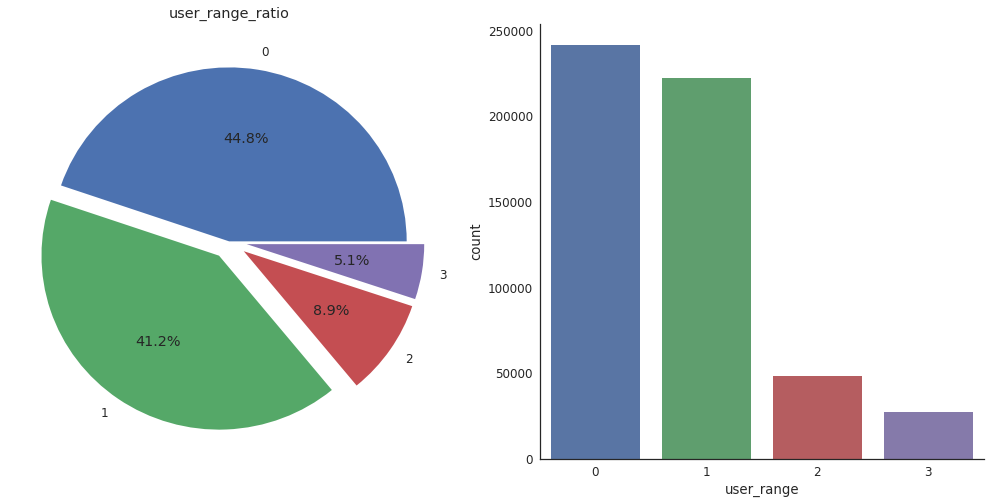

In [9]:
sns.set(font_scale=1.2, style='white')
f, ax = plt.subplots(1, 2, figsize=(17.5, 8))
user_id_count['user_range'].value_counts().plot.pie(explode=[0, 0.1, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0])
#plt.ylim([0, 300000])
ax[0].set_title('user_range_ratio')
ax[0].set_ylabel('')
sns.despine()
sns.countplot('user_range', data=user_id_count, ax=ax[1])
plt.show()

In [10]:
#商家
Mer_id_count = train.groupby(['Merchant_id'], as_index=False)['sum'].agg({'count':np.sum})
Mer_id_count.sort_values(['count'], ascending=0)[:5]

,Merchant_id,count
3227,3381,142190
424,450,73866
5089,5341,66747
717,760,60280
2800,2934,40645


In [11]:
def Mer_count(data):
    if data > 1000:
        return 3
    elif data > 100:
        return 2
    elif data > 20:
        return 1
    else:
        return 0
Mer_id_count['mer_range'] = Mer_id_count['count'].map(Mer_count)
Mer_id_count.head()

,Merchant_id,count,mer_range
0,1,14,0
1,2,11,0
2,3,18,0
3,4,40,1
4,5,79,1


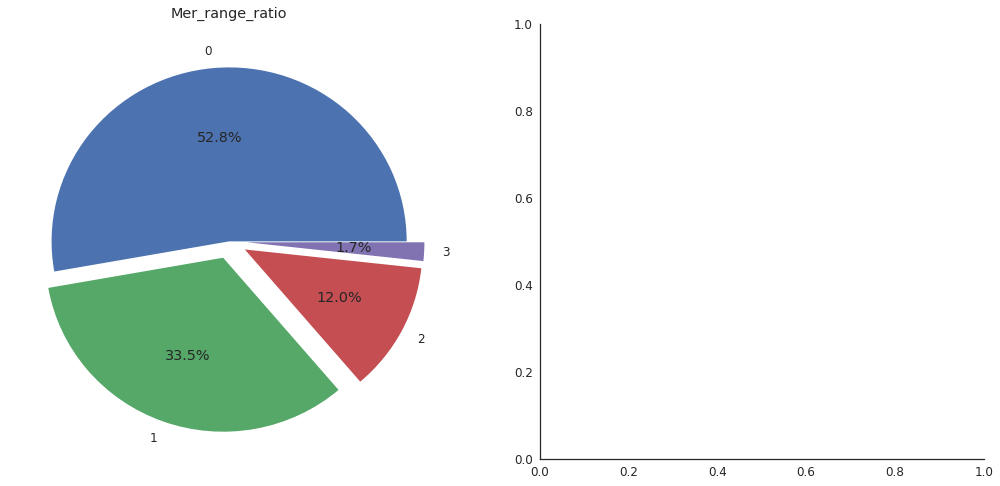

In [12]:
sns.set(font_scale=1.2, style='white')
f, ax = plt.subplots(1, 2, figsize=(17.5, 8))
Mer_id_count['mer_range'].value_counts().plot.pie(explode=[0, 0.1, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Mer_range_ratio')
ax[0].set_ylabel('')
sns.despine()

In [13]:
#优惠券

print('有优惠券的数据', train[train['Coupon_id'].notnull()].shape[0])
print('无优惠券数据', train[train['Coupon_id'].isnull()].shape[0])

有优惠券的数据 1053282
无优惠券数据 701602


In [14]:
train1 = train[train['Coupon_id'].notnull()]
# train1.head()
Cou_id_count = train1.groupby(['Coupon_id'], as_index=False)['sum'].agg({'count':np.sum})
Cou_id_count.sort_values(['count'], ascending=0)[:5]

,Coupon_id,count
5267,7610.0,46729
1653,2418.0,29284
8298,11951.0,26035
5935,8555.0,26009
1015,1480.0,24815


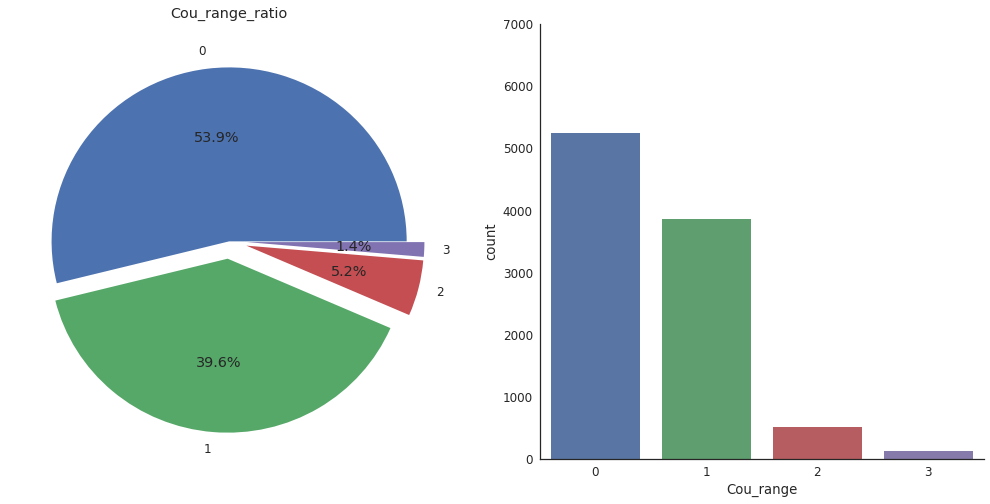

In [15]:
def Cou_count(data):
    if data > 1000:
        return 3
    elif data > 100:
        return 2
    elif data > 10:
        return 1
    else:
        return 0

Cou_id_count['Cou_range'] = Cou_id_count['count'].map(Cou_count)

sns.set(font_scale=1.2,style="white")
f,ax=plt.subplots(1,2,figsize=(17.5,8))
Cou_id_count['Cou_range'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0])
plt.ylim([0, 7000])
ax[0].set_title('Cou_range_ratio')
ax[0].set_ylabel('')
sns.despine()
sns.countplot('Cou_range',data=Cou_id_count,ax=ax[1])
plt.show()

In [18]:
#折扣率
def convertRate(row):
    if pd.isna(row):
        return 1.0
    elif ":" in str(row):
        rows = str(row).split(':')
        return np.round(1.0 - float(rows[1]) / float(rows[0]), 2)
    else:
        return float(row)
train['discount_rate'] = train['Discount_rate'].apply(convertRate)
print('Discount_rate 类型', train['discount_rate'].unique())


Discount_rate 类型 [1.   0.87 0.95 0.9  0.83 0.8  0.5  0.85 0.75 0.67 0.93 0.7  0.6  0.97
 0.98 0.99 0.33 0.2  0.4 ]


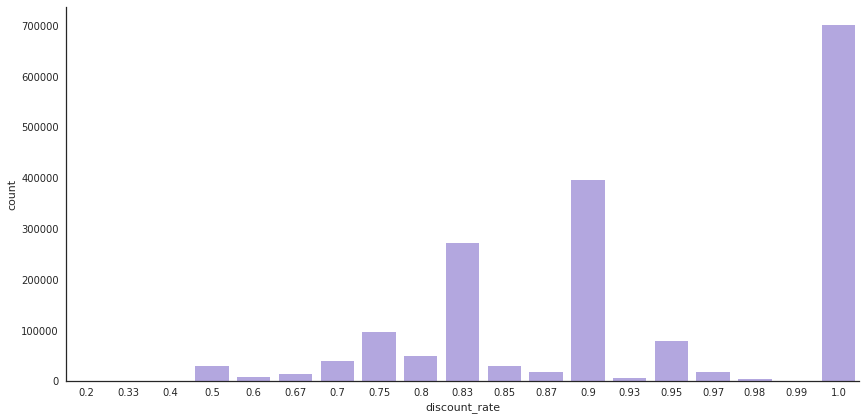

In [19]:
sns.set(style='white')
sns.factorplot(x='discount_rate', data=train, kind='count', size=6, aspect=2, color='#ad9ee8')

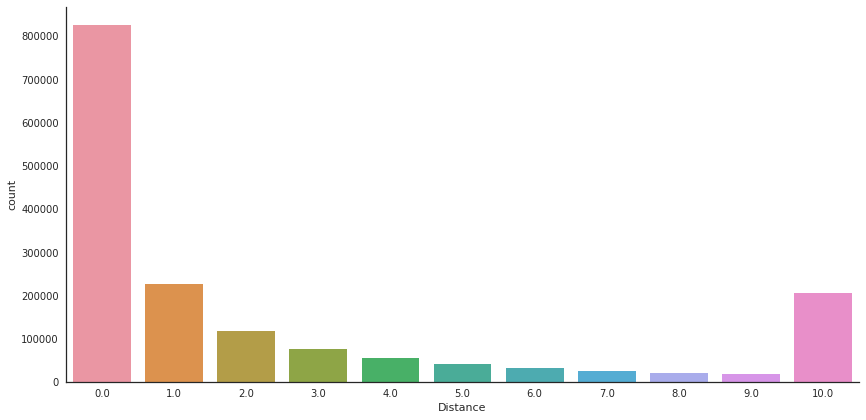

In [20]:
#距离
sns.set(style='white')
sns.factorplot(x='Distance', data=train, kind='count', size=6, aspect=2)

In [21]:
#接收和使用日期
couponbydate = train[train['Date_received'].notna()][['Date_received', 'Date']].fillna(-1).groupby(['Date_received'], as_index=False).count()
couponbydate.columns = ['Date_received', 'count']
buybydate = train[train['Date'].notna() & train['Date_received'].notna()][['Date_received', 'Date']].groupby(['Date_received'], as_index=False).count()
buybydate.columns = ['Date_received', 'count']

In [22]:
couponbydate.head()

,Date_received,count
0,20160101.0,554
1,20160102.0,542
2,20160103.0,536
3,20160104.0,577
4,20160105.0,691


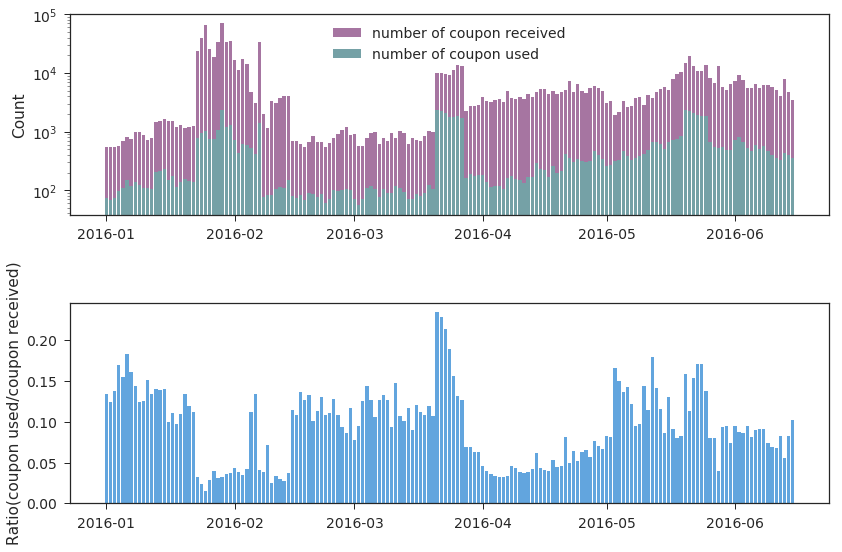

In [23]:
date_buy = train['Date'].unique()
date_buy = sorted(date_buy[pd.notna(date_buy)])
 
date_received = train['Date_received'].unique()
date_received = sorted(date_received[pd.notna(date_received)])
 
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)
plt.figure(figsize = (12,8))
date_received_dt = pd.to_datetime(date_received, format='%Y%m%d')
plt.subplot(211)
plt.bar(date_received_dt, couponbydate['count'], label = 'number of coupon received',color='#a675a1')
plt.bar(date_received_dt, buybydate['count'], label = 'number of coupon used',color='#75a1a6')
plt.yscale('log')
plt.ylabel('Count')
plt.legend()
 
plt.subplot(212)
plt.bar(date_received_dt, buybydate['count']/couponbydate['count'],color='#62a5de')
plt.ylabel('Ratio(coupon used/coupon received)')
plt.tight_layout()